In [1]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.shape)
df.head(5)

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Info about No of Nor Null value and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
#Missing values check
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
#Check the structure of dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

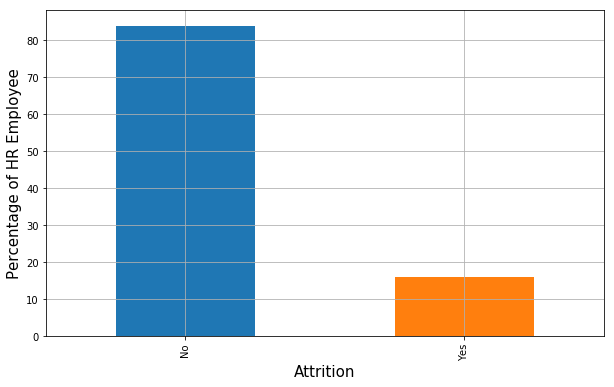

In [6]:
(df["Attrition"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(10,6))
plt.xlabel("Attrition", fontsize=15)
plt.ylabel("Percentage of HR Employee", fontsize=15)
plt.grid()
plt.show()

From the plot, we observe that about 80% of the employees has Attrition as No

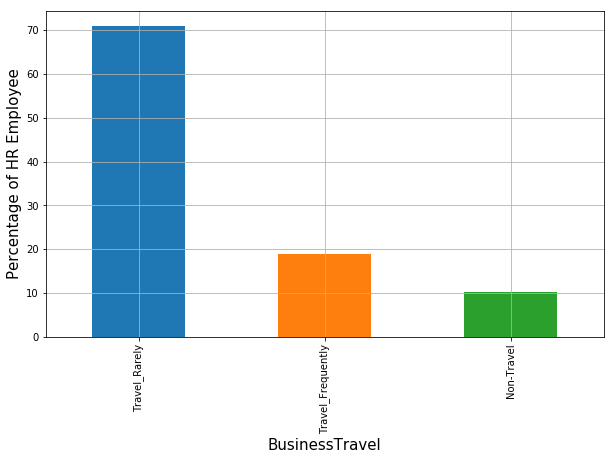

In [7]:
(df["BusinessTravel"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(10,6))
plt.xlabel("BusinessTravel", fontsize=15)
plt.ylabel("Percentage of HR Employee", fontsize=15)
plt.grid()
plt.show()

From the plot we observe that 72% of the employees Travel Rarely

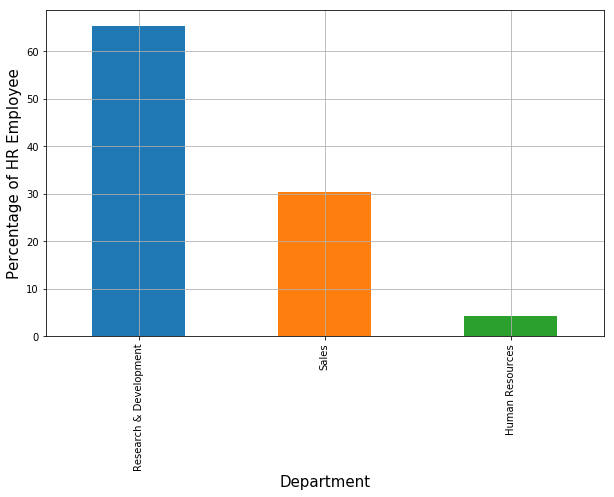

In [8]:
(df["Department"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(10,6))
plt.xlabel("Department", fontsize=15)
plt.ylabel("Percentage of HR Employee", fontsize=15)
plt.grid()
plt.show()

From the plot we observe that 68% of the employees belongs to the Research & Development department

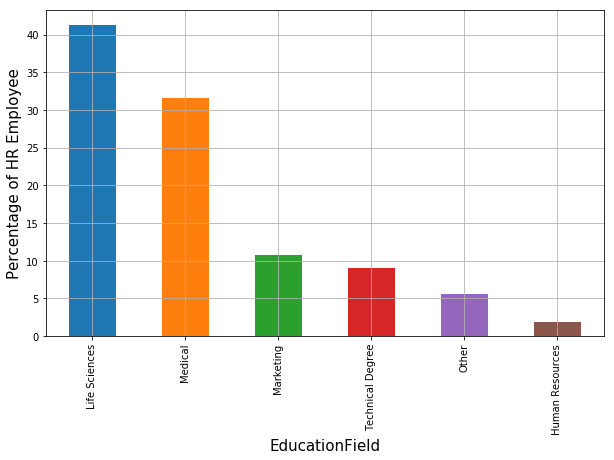

In [9]:
(df["EducationField"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(10,6))
plt.xlabel("EducationField", fontsize=15)
plt.ylabel("Percentage of HR Employee", fontsize=15)
plt.grid()
plt.show()

From the plot we observe that 43% of the employees educated with Life Science as education field

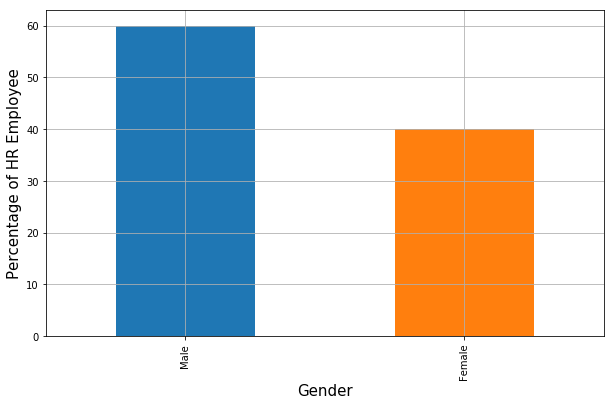

In [10]:
(df["Gender"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(10,6))
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Percentage of HR Employee", fontsize=15)
plt.grid()
plt.show()

From the plot we observe that 60% of the employees are Male

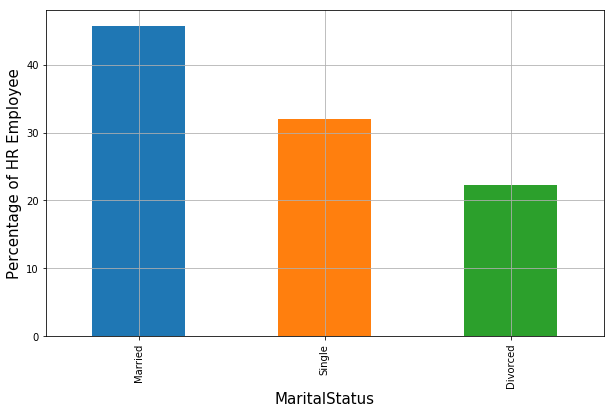

In [11]:
(df["MaritalStatus"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(10,6))
plt.xlabel("MaritalStatus", fontsize=15)
plt.ylabel("Percentage of HR Employee", fontsize=15)
plt.grid()
plt.show()

From the plot we observe that 46% of the employees are Married, 32% of the employees are Single and rest are Divorced

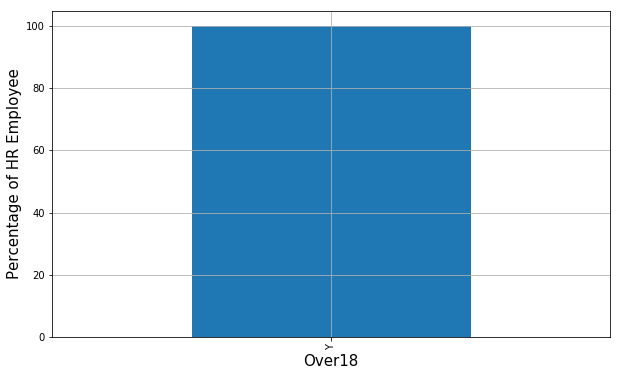

In [12]:
(df["Over18"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(10,6))
plt.xlabel("Over18", fontsize=15)
plt.ylabel("Percentage of HR Employee", fontsize=15)
plt.grid()
plt.show()

From the plot we observe that 100% of the employees are more than 18 years of old (Age)

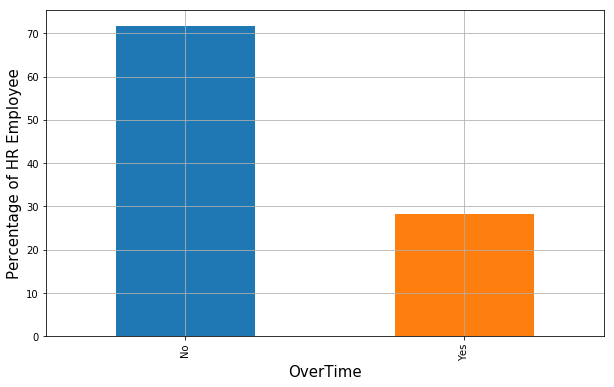

In [13]:
(df["OverTime"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(10,6))
plt.xlabel("OverTime", fontsize=15)
plt.ylabel("Percentage of HR Employee", fontsize=15)
plt.grid()
plt.show()

From the plot we observe that 71% of the employees do not work Overtime

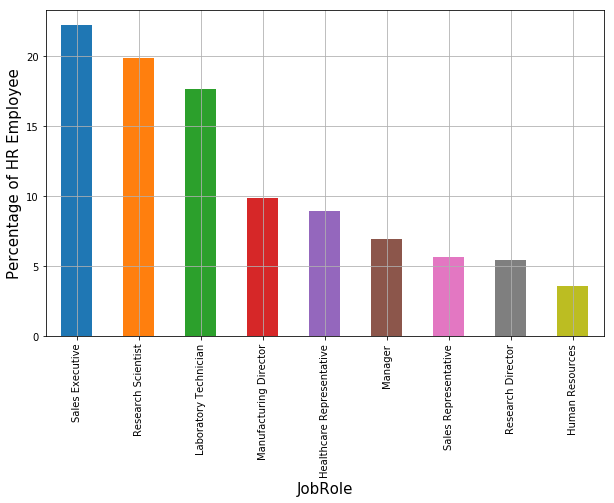

In [14]:
(df["JobRole"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(10,6))
plt.xlabel("JobRole", fontsize=15)
plt.ylabel("Percentage of HR Employee", fontsize=15)
plt.grid()
plt.show()

From the plot we observe that 27% of the employees worked as Sales Executive

In [15]:
# Process the categorical columns i.e., assigning the numerical value to words

# create the Labelencoder object
le = LabelEncoder()

#convert the categorical columns into numeric
for label in df.columns:
    if(df[label].dtypes=="O"):
        df[label] = le.fit_transform(df[label])

#display the initial records
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
target = df['Attrition']
features = df.drop('Attrition', axis = 1)
#create the train/test split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1176, 34)
(1176,)
(294, 34)
(294,)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Create the model and train
model = RandomForestClassifier()
model.fit(x_train,y_train)

#predict the results for test
test_pred = model.predict(x_test)

#test the accuracy
print("Accuracy:",accuracy_score(y_test, test_pred)*100,"%")

Accuracy: 82.99319727891157 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


One of the best feature Random forest model has- it provides the importance of variables/features in the data/model. For this problem, we are interested in knowing which feature/factor contribute the most in the Attrition and RF’s one function can give us this information. This is just another reason why we have used RF.

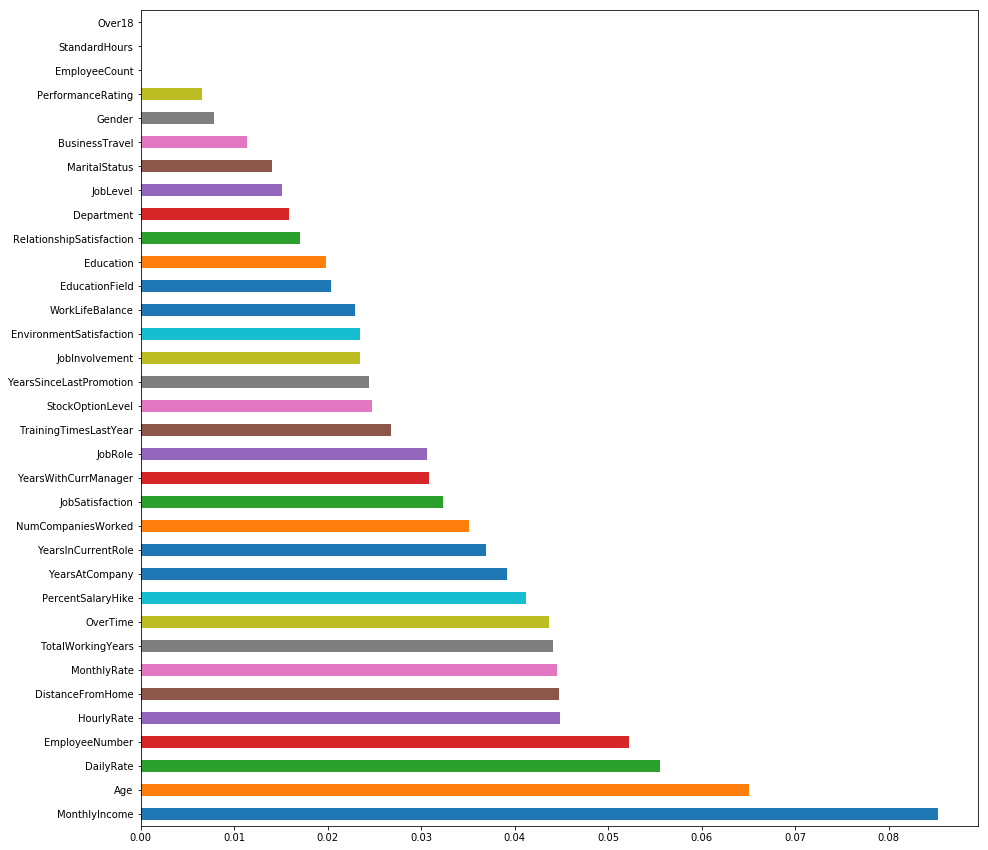

In [18]:
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
feature_importances = feature_importances.nlargest(x_train.shape[1])
plt.figure(figsize=(15,15))
feature_importances.plot(kind='barh')